# Self-Driving Car Engineer Nanodegree


## Project 1: **Finding Lane Lines on the Road** 
***
**update on 2017-4-16**: I feel I almost forget everything in this project after 2 month when I nearly finish term 1. So I reorganize the codes to refresh my memory.


Check out the video clip "raw-lines-example.mp4" to see what the output should look like after using the helper functions below. 

Then you will try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines as in "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


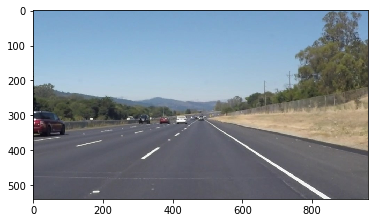

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

- `cv2.inRange()` for color selection  
- `cv2.fillPoly()` for regions selection  
- `cv2.line()` to draw lines on an image given endpoints  
- `cv2.addWeighted()` to coadd / overlay two images
- `cv2.cvtColor()` to grayscale or change color
- `cv2.imwrite()` to output images to file  
- `cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [5]:
import os, glob
folder = "test_images"
files = glob.glob(os.path.join(folder,"*.jpg"))
print(files)
print(len(files))

['test_images/solidWhiteCurve.jpg', 'test_images/solidWhiteRight.jpg', 'test_images/solidYellowCurve.jpg', 'test_images/solidYellowCurve2.jpg', 'test_images/solidYellowLeft.jpg', 'test_images/whiteCarLaneSwitch.jpg']
6


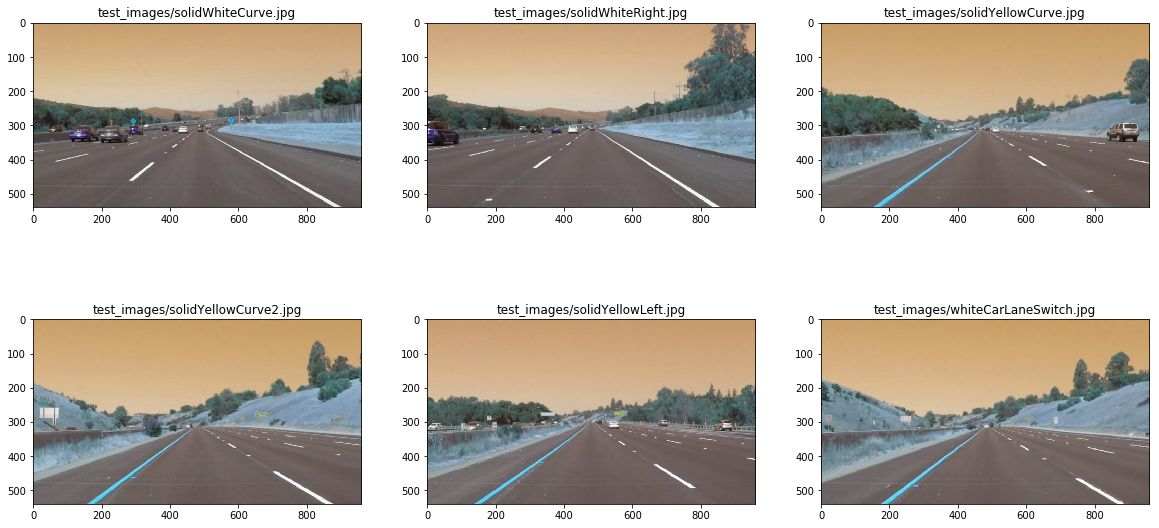

In [22]:
plt.figure(figsize=(20, 10)) 
for i,file in enumerate(files):
    image = cv2.imread(file) # bgr     
    plt.subplot(231+i)
    plt.imshow(image)
    plt.title(file)
    del image

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. **Save resluts into the test_images directory**, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

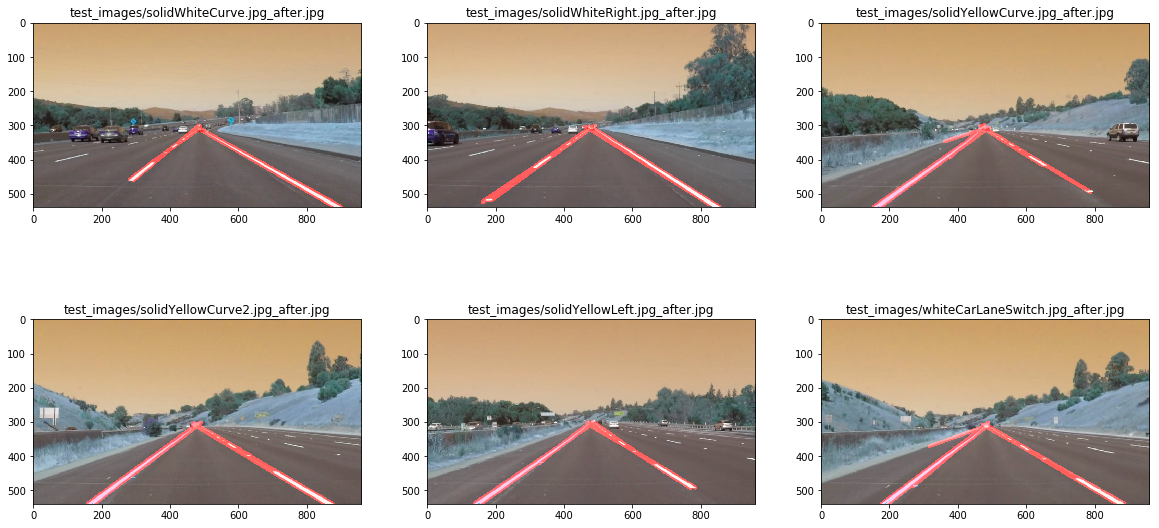

In [47]:
plt.figure(figsize=(20, 10)) 
for i,file in enumerate(files):  
    image = cv2.imread(file)  # (540, 960, 3)
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)  # (540, 960)
    blur_gray = cv2.GaussianBlur(gray, (5, 5), 0) # shape(540,960)
    edges = cv2.Canny(blur_gray, 50, 150)  # (540, 960)
    vertices = np.array([[(0,540),(450, 300), (490, 300), (960,540)]], dtype=np.int32)
    mask = np.zeros_like(gray)
    cv2.fillPoly(mask, vertices, 255) # 255 is for convenience of bitwise, every digit is 1
    masked_edges = cv2.bitwise_and(mask, edges)
    lines = cv2.HoughLinesP(masked_edges, rho = 2, theta = np.pi/180, threshold = 60, 
                            lines = np.array([]),minLineLength = 100, maxLineGap = 300)
    line_image = np.zeros_like(image)  # 3D
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image, (x1, y1), (x2, y2), color = (255,0,0), thickness = 10)
    lines_edges = cv2.addWeighted(image, 1.0,line_image, 1.0, 0)
    
    fname = file+"_after.jpg"
    mpimg.imsave(fname, lines_edges)
    plt.subplot(231+i)
    plt.imshow(lines_edges)
    plt.title(fname)

In [59]:
for line in lines:
    for x1,y1,x2,y2 in line:
        fit = np.polyfit((x1, y1), (x2, y2), 1)
        print((x1, y1), (x2, y2),fit)

(155, 538) (484, 308) [ -4.59530026e-01   5.55227154e+02]
(235, 492) (488, 308) [  -0.70038911  652.59143969]
(154, 538) (472, 315) [ -4.08854167e-01   5.34963542e+02]
(463, 303) (785, 496) [  1.80625 -51.29375]
(174, 538) (490, 308) [ -5.00000000e-01   5.77000000e+02]
(467, 306) (648, 419) [  1.42236025 -16.24223602]
(464, 302) (787, 496) [  1.7962963  -46.48148148]
(361, 348) (487, 307) [   13.84615385 -4511.46153846]
(374, 396) (477, 300) [   -8.04545455  3486.        ]
(175, 539) (443, 337) [ -2.91208791e-01   4.93961538e+02]


## plot pipeline images for report

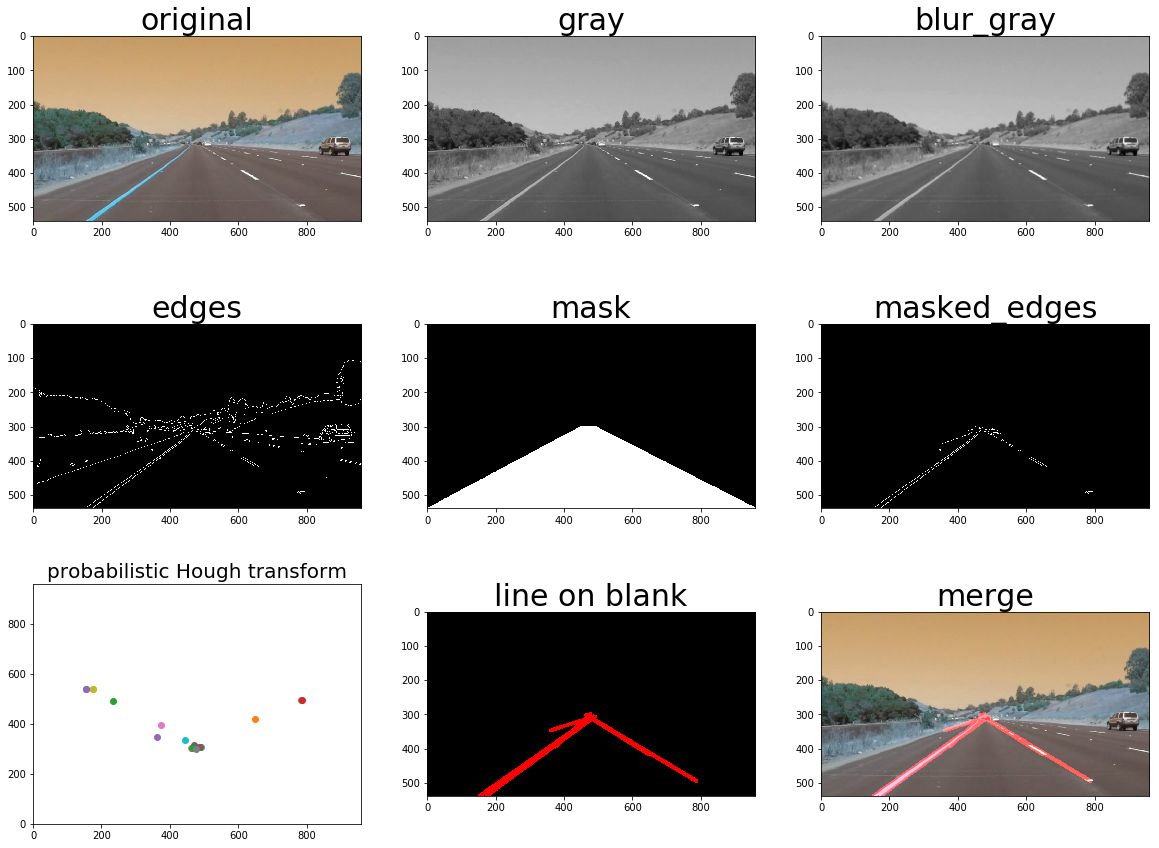

In [58]:
plt.figure(figsize=(20,15))
index = np.random.randint(6)
file = files[index]
# 1
image = cv2.imread(file)  # (540, 960, 3)
plt.subplot(331)
plt.imshow(image)
plt.title("original",fontsize=30)
# 2
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)  # (540,960)
plt.subplot(332)
plt.imshow(gray, cmap="gray")
plt.title("gray",fontsize=30)
# 3
blur_gray = cv2.GaussianBlur(gray, (5, 5), 0) # (540,960)
plt.subplot(333)
plt.imshow(blur_gray, cmap="gray")
plt.title('blur_gray',fontsize=30)
# 4
edges = cv2.Canny(blur_gray, 50, 150)  # (540, 960)
plt.subplot(334)
plt.imshow(edges,cmap="gray")
plt.title("edges",fontsize=30)
# 5
vertices = np.array([[(0,540),(450, 300), (490, 300), (960,540)]], dtype=np.int32)
mask = np.zeros_like(gray)
cv2.fillPoly(mask, vertices, 255) # 255 is for convenience of bitwise, every digit is 1
plt.subplot(335)
plt.imshow(mask,cmap="gray")
plt.title("mask",fontsize=30)
# 6
masked_edges = cv2.bitwise_and(mask, edges)
plt.subplot(336)
plt.imshow(masked_edges,cmap="gray")
plt.title("masked_edges",fontsize=30)
# 7
lines = cv2.HoughLinesP(masked_edges, rho = 2, theta = np.pi/180, threshold = 60, 
                        lines = np.array([]),minLineLength = 80, maxLineGap = 300)
plt.subplot(337)
for line in lines:
    for x1,y1,x2,y2 in line:
        plt.scatter(x1,y1)
        plt.scatter(x2,y2)
plt.axis([0,960,0,960]) # for quick look of slope rate
#plt.axis([0,960,0,540])
#plt.gca().invert_yaxis() # to visualize as we do the images
plt.title("probabilistic Hough transform",fontsize=20)

# 8 
line_on_blank = np.zeros_like(image)  # 3D
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_on_blank, (x1, y1), (x2, y2), color = (255,0,0), thickness = 10)
plt.subplot(338)
plt.imshow(line_on_blank)
plt.title("line on blank",fontsize=30)

# 9
merge = cv2.addWeighted(image, 1.0,line_on_blank, 1.0, 0)
plt.subplot(339)
plt.imshow(merge)
plt.title("merge",fontsize=30)
plt.show()

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

In [37]:
def process_image(image):
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)  # (540, 960)
    blur_gray = cv2.GaussianBlur(gray, (5, 5), 0) # shape(540,960)
    edges = cv2.Canny(blur_gray, 50, 150)  # (540, 960)
    vertices = np.array([[(0,540),(450, 300), (490, 300), (960,540)]], dtype=np.int32)
    mask = np.zeros_like(gray)
    cv2.fillPoly(mask, vertices, 255)
    masked_edges = cv2.bitwise_and(mask, edges)
    lines = cv2.HoughLinesP(masked_edges, rho = 2, theta = np.pi/180, threshold = 60, 
                            lines = np.array([]),minLineLength = 80, maxLineGap = 300)
    line_image = np.zeros_like(image)  # 3D
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image, (x1, y1), (x2, y2), color = (255,0,0), thickness = 10)
    lines_edges = cv2.addWeighted(image, 1.0,line_image, 1.0, 0)

    return lines_edges

Let's try the one with the solid white lane on the right first ...

In [38]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [39]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


100%|█████████▉| 221/222 [00:03<00:00, 65.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 2.84 s, sys: 800 ms, total: 3.64 s
Wall time: 3.87 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [40]:
HTML("""<video width="960" height="540" controls><source src="{0}"></video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [41]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4


100%|█████████▉| 681/682 [00:10<00:00, 63.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

CPU times: user 8.94 s, sys: 2.35 s, total: 11.3 s
Wall time: 11.1 s


In [42]:
HTML("""<video width="960" height="540" controls> <source src="{0}"></video>
""".format(yellow_output))

## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [196]:
def process_image2(image):
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)  # (540, 960)
    blur_gray = gaussian_blur (gray,5) # smooth, shape(540,960)
    edges = canny(blur_gray, 50, 150)
    vertices = np.array([[(100,540),(450, 350), (490, 350), (860,540)]], dtype=np.int32)
    masked_edges = region_of_interest(edges,vertices)
    lines = hough_lines(masked_edges, 2, np.pi/180, 15, 40, 20)  # (540, 960, 3)
    lines_edges = weighted_img(lines,image)

    return lines_edges

In [45]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video extra.mp4
[MoviePy] Writing video extra.mp4


100%|██████████| 251/251 [00:08<00:00, 29.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: extra.mp4 

CPU times: user 6.81 s, sys: 1.83 s, total: 8.64 s
Wall time: 9.62 s


In [46]:
HTML("""<video width="960" height="540" controls><source src="{0}"></video>
""".format(challenge_output))